# Indicateurs énergétiques – Pétrole brut – Ensembles de données et méthodologies

## Importance des données sur l'énergie
L’existence de données fiables permet au gouvernement, aux acteurs du secteur et au public canadien de mener des discussions et de prendre des décisions éclairées. Ces données jouent un rôle de premier plan en ce qui a trait au renforcement de la confiance du public, de la compétitivité économique et de la capacité du gouvernement à appuyer la transition vers une économie sobre en carbone.

## Aperçu de l’information sur l’énergie au Canada:
L’information sur l’énergie comprend des statistiques, des données, des analyses et des projections liées à la production, la transformation, la distribution et l’utilisation d’énergie, ainsi qu’à l’interrelation entre l’énergie et l’économie, et la société et l’environnement.

Le système d’information sur l’énergie du Canada est le fruit de la contribution de plusieurs organisations, dont les suivantes :
- quatre ministères et organismes fédéraux;  
 - Ressources naturelles Canada [(lien)](https://www.rncan.gc.ca/accueil);  
 - Statistique Canada [(lien)](https://www.statcan.gc.ca/fra/debut);  
 - Environnement et Changement climatique Canada [(lien)](https://www.canada.ca/fr/environnement-changement-climatique.html);  
 - Régie de l’énergie du Canada [(lien)](https://www.cer-rec.gc.ca/index-fra.html);  
 
- des ministères, organismes de réglementation et régies de services publics provinciaux et territoriaux;  
- des intervenants sur le marché de l’énergie (p. ex., producteurs d’énergie, sociétés pipelinières et exploitants de réseaux);  
- des associations du secteur et organismes de recherche universitaires;  
- le site Web du gouvernement ouvert du Canada [(lien)](https://open.canada.ca/fr);  
- __le Portail canadien d’information sur l’énergie (lancé en juin 2019) [(lien)](https://www.statcan.gc.ca/fra/themes-debut/energie).__

## Portail canadien d’information sur l’énergie:


En juin 2019, le gouvernement du Canada a lancé le Portail canadien d’information sur l’énergie [(lien)](https://www.statcan.gc.ca/fra/themes-debut/energie). Ce portail est un guichet unique pour l’information sur l’énergie qui procure un point d’accès à toutes les statistiques du gouvernement du Canada et propose des liens vers un vaste éventail de produits d’information sur l’énergie.    

Bien que l’information sur l’énergie au Canada abonde, il peut être difficile de s’y retrouver, de l’interpréter et de la vérifier, en particulier pour les profanes. De plus, la mesure des données, les définitions et les normes de présentation de l’information varient d’un fournisseur d’information à l’autre. Il arrive souvent que les données ne soient pas accessibles dans des formats structurés et lisibles par machine. Enfin, les données ne sont souvent pas publiées en temps opportun et les délais sont considérés comme trop longs, compte tenu de la demande croissante d’information en temps réel.


## Objectif du présent bloc-notes

•	1)  Déterminer les principaux ensembles de données présentés dans les [indicateurs énergétiques portant sur le pétrole brut au Canada](https://www.cer-rec.gc.ca/nrg/tl/nrgcmmdt/nrgndctrlctrct-fra.html);  
•	2) Téléverser chaque ensemble de données utilisé dans les indicateurs énergétiques dans le bloc-notes Jupyter;  
•	3) Faire un graphique pour chaque ensemble de données;  
•	4) Fournir des liens vers d’autres ensembles de données accessibles au public aux fins d’analyse plus poussée.

__Les ensembles de données utilisés dans les indicateurs énergétiques viennent de multiples sources publiques accessibles gratuitement. Les fichiers des ensembles de données comme tels ne sont pas fournis pour accompagner le bloc-notes. Les données sont plutôt téléversées directement dans le bloc-notes par le fournisseur. Cela assure la transparence, la reproductibilité et le caractère opportun pour les utilisateurs.__

__Les ensembles de données utilisés dans ce bloc-notes ne sont généralement pas dans un format bidimensionnel lisible par machine. De plus, les unités de mesure entre les ensembles de données ne sont pas normalisées. Pour qu’ils présentent une valeur analytique, les ensembles de données du bloc-notes sont transformés et normalisés afin d’assurer leur comparabilité.__

Dans le cas des unités qui ne figurent pas dans ce bloc-notes, la Régie de l’énergie du Canada présente sur son site Web des tables de conversion d’unités d’énergie [(lien)](https://apps.cer-rec.gc.ca/Conversion/conversion-tables.aspx?GoCTemplateCulture=fr-CA).


In [7]:
import pandas as pd
import matplotlib.pyplot as plthfxyxm
import requests
from bs4 import BeautifulSoup as bs
import zipfile
import io
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import datetime
import calendar
import numpy as np
import re
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# établir les paramètres globaux
plt.style.use('ggplot')
sns.set_palette(sns.color_palette("tab20", 20))
m3_to_bbl = 6.28981
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Indicateurs énergétiques – Pétrole brut

### Prix du pétrole brut

Le pétrole brut est commercialisé partout dans le monde. Il existe de nombreuses qualités de pétrole brut (selon la teneur en soufre et la densité/viscosité), chacune imposant un prix différent. Le West Texas Intermediate (« WTI ») est un pétrole brut non corrosif de densité légère à moyenne dont le prix est établi à Cushing, en Oklahoma. Le Brent est un pétrole brut léger non corrosif qui sert de prix de référence pour l’achat de pétrole à l’échelle mondiale. Le Western Canadian Select (« WCS ») est un mélange canadien de bitume ou de pétrole lourd et de condensats ou de pétrole léger dont le prix est établi à Hardisty, en Alberta.

Le pétrole brut peut être négocié entre acheteurs et vendeurs aux fins de livraison immédiate ou à court terme (au prix du disponible) ou de livraison à terme (au prix à terme). Le prix du disponible et le prix à terme peuvent varier selon les attentes immédiates et futures relativement aux conditions du marché.


#### 1) Principaux ensembles de données
Les prix du pétrole brut au Canada et à l’étranger figurent dans le rapport intitulé Petroleum Price Data publié par Kent Group Ltd. [(lien)](https://charting.kentgroupltd.com/). Ces ensembles de données alimentent les analyses des prix du pétrole brut présentées sur le site Web de Ressources naturelles Canada [(lien)](https://www.rncan.gc.ca/nos-ressources-naturelles/sources-denergie-reseau-de-distr/combustibles-fossiles-propres/petrole-brut/prix-petrole/18151?_ga=2.23023227.1972761253.1583180599-1345165153.1542644376). Ces ensembles de données sont publiés grâce à un financement du gouvernement du Canada.

L’Energy Information Administration (« EIA ») des États-Unis publie des ensembles de données concernant les prix de divers types de pétrole brut et produits pétroliers, y compris ceux du WTI et du Brent [(lien)](https://www.eia.gov/dnav/pet/PET_PRI_SPT_S1_D.htm).


#### 2) Téléverser les ensembles de données

In [8]:
#accéder au rapport Petroleum Price Data de Kent Group Ltd.
url = 'https://charting.kentgroupltd.com/Charting/DownloadExcel?file=/WPPS/Crude/Crude/DAILY/YYYY/Crude_Crude_DAILY_YYYY.xlsx'

start_year = 2017
end_year = datetime.datetime.today().year
sheet_name = 'Prices'

# les données sont téléchargées une année à la fois
data = []
for y in range(start_year, end_year+1):
    url_full = url.replace('YYYY', str(y))
    r = requests.get(url_full, allow_redirects=True)
    if r.status_code == requests.codes.ok:
        df = pd.read_excel(io.BytesIO(r.content), sheet_name=sheet_name, header=(2,3), index_col=0, parse_dates=[0])
        data.append(df)   
    else:
        print('Error! File could not be downloaded for: ' + url_full)

# prix en unités métriques ($ CAN/m3)
df_kent_metric = pd.concat(data, axis=0, ignore_index=False)
df_kent_metric.columns = df_kent_metric.columns.get_level_values(0).str.replace(' Spot', '')
df_kent_metric.index.name = 'Date'
df_kent_metric.dropna(how='all', inplace=True)

# convertir en unités impériales ($ US/b)
df_kent_imperial = df_kent_metric[['Exchange Rate']]
for col in df_kent_metric.columns:
    if not col.startswith('Exchange Rate'):
        df_kent_imperial[col] = df_kent_metric[col] / m3_to_bbl / df_kent_imperial['Exchange Rate']

In [9]:
# accéder aux prix de l’EIA en $ US/b
df_eia = pd.read_excel('https://www.eia.gov/dnav/pet/xls/PET_PRI_SPT_S1_D.xls', sheet_name = 'Data 1', header=2, parse_dates=['Date'], index_col='Date')
df_eia.rename(columns={'Cushing, OK WTI Spot Price FOB (Dollars per Barrel)':'WTI', 'Europe Brent Spot Price FOB (Dollars per Barrel)':'Brent'}, inplace=True)
df_prices_all = df_kent_imperial.merge(df_eia, on='Date', how ='inner')

#### 3) Faire un graphique pour l’ensemble de données

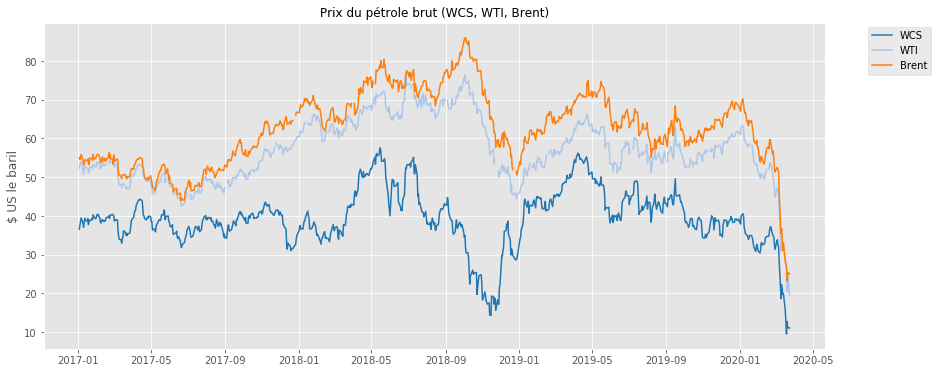

In [10]:
# faire un graphique pour tous les prix
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(14,6))
ax1.plot(df_prices_all.index, df_prices_all[['WCS', 'WTI', 'Brent']])
ax1.legend(df_prices_all[['WCS', 'WTI', 'Brent']].columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax1.set_title('Prix du pétrole brut (WCS, WTI, Brent)', fontsize=12)
ax1.set_ylabel('$ US le baril');

#### 4) Autres ensembles de données liés aux prix du pétrole brut
Le gouvernement de l’Alberta publie chaque mois les prix du pétrole brut WCS et WTI dans le rapport intitulé Economic Dashboard [(lien)](https://economicdashboard.alberta.ca/OilPrice).

Le gouvernement de l’Alberta publie également les prix de référence mensuels du pétrole brut de diverses qualités produit en Alberta (pétrole léger, moyen, lourd et ultra lourd). Le rapport intitulé Oil Par Prices est publié aux fins du calcul des redevances provinciales. Les prix de référence sont calculés en fonction des indices du marché à Hardisty et Edmonton, et sont modifiés selon l’acheminement et la qualité du brut [(lien)](https://www.alberta.ca/oil-par-prices.aspx).

La Régie de l’énergie du Canada publie le rapport intitulé Aperçu annuel des exportations de pétrole brut, qui comprend les prix moyens des exportations [(lien)](https://www.cer-rec.gc.ca/nrg/sttstc/crdlndptrlmprdct/stt/crdlsmmr/crdlsmmr-fra.html).


### Prix de l'essence

#### 1) Principal ensemble de données

Les prix de l’essence à la pompe sont établis au moyen de relevés quotidiens du prix de vente au détail de l’essence dans les grands centres du Canada. Cette information est recueillie par Kent Group Ltd., grâce à un financement de Ressources naturelles Canada [(lien)](https://charting.kentgroupltd.com/). Il est possible de consulter les prix quotidiens depuis 2016 et les prix hebdomadaires depuis 2011.

#### 2) Téléverser l’ensemble de données

In [11]:
# KENT : prix quotidiens de l’essence sans plomb, prix au détail, taxes comprises (en c/litre) 
url = 'https://charting.kentgroupltd.com/Charting/DownloadExcel?file=/WPPS/Unleaded/Retail%20(Incl.%20Tax)/DAILY/YYYY/Unleaded_Retail%20(Incl.%20Tax)_DAILY_YYYY.xlsx'
# url = 'https://charting.kentgroupltd.com/Charting/DownloadExcel?file=/WPPS/Unleaded/Retail%20(Incl.%20Tax)/MONTHLY/YYYY/Unleaded_Retail%20(Incl.%20Tax)_MONTHLY_YYYY.xlsx'      
   
start_year = 2016
end_year = datetime.datetime.today().year
sheet_name = 'Prices'

# télécharger les données une année à la fois
data = []
for y in range(start_year, end_year+1):
    header = 0 if y == 2016 else 2
    url_full = url.replace('YYYY', str(y))
    r = requests.get(url_full, allow_redirects=True)
    if r.status_code == requests.codes.ok:
        df = pd.read_excel(io.BytesIO(r.content), sheet_name=sheet_name, header=header, index_col=None)
        df.rename(columns={'Unnamed: 0':'Region'}, inplace=True)
        if 'Average' in df.columns:
            df.drop('Average', axis=1, inplace=True)
        df = pd.melt(df, id_vars=['Region'], var_name='Date', value_name='Price (c/litre)')
        df['Price (c/litre)'] = pd.to_numeric(df['Price (c/litre)'], errors='coerce')
        df.dropna(subset=['Price (c/litre)'], inplace=True)
        df['Date'] = pd.to_datetime(str(y)+'/'+df['Date'])
        data.append(df)
    else:
        print('Error! File could not be downloaded for: ' + url_full)
df_prices_gasoline = pd.concat(data, axis=0, sort=False, ignore_index=True)
df_prices_gasoline['Region'] = df_prices_gasoline['Region'].str.replace('*', '').str.replace('CITY OF ', '').str.replace('Canada Ave(V)', 'CANADA AVERAGE', regex=False)
df_prices_gasoline = pd.pivot_table(df_prices_gasoline, values='Price (c/litre)', index=['Date'], columns=['Region'])

#### 3) Faire un graphique pour l’ensemble de données

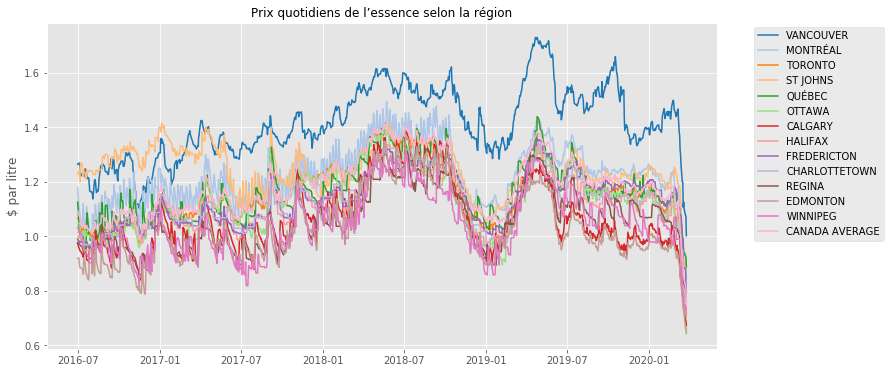

In [12]:
cities = ['VANCOUVER', 'MONTRÉAL', 'TORONTO', 'ST JOHNS', 'QUÉBEC', 'OTTAWA', 'CALGARY', 'HALIFAX', 'FREDERICTON', 
          'CHARLOTTETOWN', 'REGINA', 'EDMONTON', 'WINNIPEG', 'CANADA AVERAGE']

fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax1.plot(df_prices_gasoline.index, df_prices_gasoline[cities]/100)
ax1.legend(df_prices_gasoline[cities].columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax1.set_title('Prix quotidiens de l’essence selon la région', fontsize =12)
ax1.set_ylabel('$ par litre');

#### 4) Autres ensembles de données liés aux prix de l’essence
Statistique Canada publie le rapport intitulé Prix de détail moyens mensuel, essence et mazout, par géographie (tableau 18-10-0001-01)  [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=1810000101&request_locale=fr). Ce rapport présente les prix mensuels moyens de l’essence ordinaire sans plomb aux stations libre-service dans la plupart des grandes villes canadiennes.

### Production de pétrole brut

#### 1) Principal ensemble de données

Les données sur la production de pétrole brut sont recueillies par les gouvernements provinciaux et sont utilisées pour déterminer le montant des redevances à percevoir ou appuyer les mandats de réglementation. La Régie regroupe les statistiques des gouvernements provinciaux et publie le rapport intitulé Production estimative de pétrole brut et d'équivalents au Canada [(lien)](https://www.cer-rec.gc.ca/nrg/sttstc/crdlndptrlmprdct/stt/stmtdprdctn-fra.html).

Les données remontent jusqu’à 2000 et sont mises à jour par la Régie chaque mois. Les données provenant des gouvernements provinciaux peuvent être décalées de plus de six mois. La définition de « production » varie selon les sources.


La Régie regroupe les statistiques provinciales suivantes :
- Gouvernement de la Colombie-Britannique – Rapport intitulé Production of crude oil, condensate and Pentanes Plus [(lien)](http://www2.gov.bc.ca/gov/content/industry/natural-gas-oil/statistics);

    _Production de pétrole brut = Production de la Colombie-Britannique seulement_
    
    _Production de condensats = Condensat à la tête de puits + Condensats de puits + Pentanes plus_


- Alberta Energy Regulator – Rapport ST3: Alberta Energy Resource Industries Monthly Statistics [(lien)](https://aer.ca/providing-information/data-and-reports/statistical-reports/st3);

    _Production de pétrole brut = Production totale de pétrole classique_
    
    _Production de bitume = Production totale non valorisée + Production valorisée_
    
    _Production de condensats = Production de condensats + Processus de collecte de l’usine de pentanes plus + Rendement du fractionnement de pentanes plus_


- Gouvernement de la Saskatchewan – Rapport intitulé Crude Oil Volume and Value Summary [(lien)](http://publications.saskatchewan.ca/#/products/100415);

    _Production de pétrole brut = Production et volume de production de pétrole brut récupéré_


- Statistique Canada – Approvisionnement et utilisation du pétrole brut et équivalent (tableau 25-10-0063-01) [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510006301&request_locale=fr);


- Office Canada–Terre-Neuve des hydrocarbures extracôtiers – Rapport intitulé Monthly Production Summary [(lien)](https://www.cnlopb.ca/information/statistics/);

    _Production de brut = Production mensuelle totale_


- Bureau des statistiques des Territoires du Nord-Ouest – Rapport intitulé Oil and gas [(lien)](https://www.statsnwt.ca/economy/oil-gas/).

    _Production de pétrole brut = Production totale de pétrole classique_








#### 2) Téléverser l’ensemble de données

In [13]:
# accéder au rapport sur la production estimative de pétrole brut et d’équivalents de la Régie
url_cer = 'https://www.cer-rec.gc.ca/nrg/sttstc/crdlndptrlmprdct/stt/stmtdprdctn-eng.html'
sheet_prod = 'HIST - barrels per day'

r = requests.get(url_cer, allow_redirects=True)
if r.status_code == 200:
    soup = bs(r.content, 'lxml')
    links = soup.find_all('a', attrs={'href': re.compile('^/nrg/sttstc/crdlndptrlmprdct/stt/(.)*.xlsx?')})
    y = 0
    for link in links:
        if y < int(link.get('href').split('.')[-2][-4:]):
            y = int(link.get('href').split('.')[-2][-4:])
            url_prod = 'https://www.cer-rec.gc.ca' + link.get('href')
    # télécharger les plus récentes données en unités impériales (million de barils par jour)
    df_prod = pd.read_excel(url_prod, sheet_name=sheet_prod, header=0, index_col='Month', parse_dates=['Month']).dropna(1, 'all').dropna(0, 'all') / 1000000
    
    # nettoyer
    df_prod.columns = df_prod.columns.str.strip()
    df_prod['Non-upgraded Bitumen'] = df_prod['AB non-upgraded']
    df_prod['Upgraded Bitumen'] = df_prod['AB upgraded']
    short_names = {'Raw Mined Bitumen':'MI', 'Raw In Situ Bitumen':'IN', 'Canada Total':'CA', 'Non-upgraded Bitumen':'NO', 'Upgraded Bitumen':'UP'}
    df_prod.rename(columns=short_names, inplace=True)
    df_prod.columns = df_prod.columns.str[:2]
    
    # obtenir les totaux selon la province / le type par regroupement
    df_prod = df_prod.groupby(df_prod.columns, axis=1).sum()

    # nettoyer davantage
    long_names = {'MI':'Raw Mined Bitumen', 'IN':'Raw In Situ Bitumen', 'NO':'Non-upgraded Bitumen', 'UP':'Upgraded Bitumen', 
                  'AB':'Alberta', 'BC':'British Columbia', 'CA':'Canada', 'MB':'Manitoba', 'NL':'Newfoundland', 
                  'NS':'Nova Scotia', 'NW':'Territories', 'ON':'Ontario', 'SK':'Saskatchewan'}
    df_prod.rename(columns=long_names, inplace=True)
    df_prod.index.rename('Date', inplace=True)
else:
    print('Error! File could not be downloaded from: ' + url)

#### 3) Faire un graphique pour l’ensemble de données

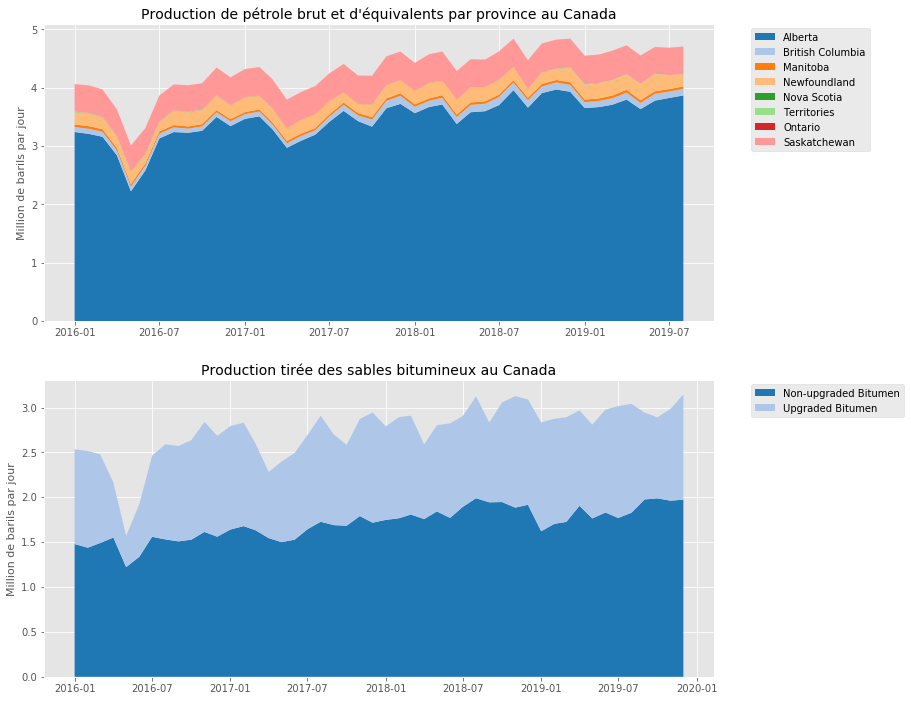

In [15]:
provs = ['Alberta', 'British Columbia', 'Manitoba', 'Newfoundland', 'Nova Scotia', 'Territories', 'Ontario', 'Saskatchewan']
types = ['Non-upgraded Bitumen', 'Upgraded Bitumen']
df_prod_prov = df_prod[(df_prod.index.year >= 2016) & (df_prod['Canada'] > 0)][provs]
df_prod_bit = df_prod[(df_prod.index.year >= 2016) & (df_prod['Non-upgraded Bitumen'] > 0) & (df_prod['Upgraded Bitumen'] > 0)][types]

# faire des graphiques pour la production de pétrole brut
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(12,12))
ax1.stackplot(df_prod_prov.index, df_prod_prov[provs].fillna(0).T)
ax1.set_ylabel('Million de barils par jour', fontsize=11)
ax1.set_title("Production de pétrole brut et d'équivalents par province au Canada", fontsize=14)
ax1.legend(df_prod_prov[provs].columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4); 

ax2.stackplot(df_prod_bit.index, df_prod_bit[types].fillna(0).T)
ax2.set_ylabel('Million de barils par jour', fontsize=11)
ax2.set_title('Production tirée des sables bitumineux au Canada', fontsize=14)
ax2.legend(df_prod_bit[types].columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4); 

#### 4) Autres ensembles de données liés à la production de pétrole brut

Pour les provinces de l’Alberta, de la Colombie-Britannique et de la Saskatchewan, Petrinex publie des données sur la production mensuelle de pétrole selon l’exploitant, le puits et l’installation [(lien)](https://www.petrinex.ca/PD/Pages/default.aspx). Petrinex regroupe des données détaillées sur la production aux fins de perception des redevances à la Couronne. L’information publique qui se trouve dans la base de données de Petrinex peut être obtenue auprès de sources existantes, notamment sur les sites Web du ministère de l’Énergie de l’Alberta, de l’Alberta Energy Regulator, du ministère de l’Énergie et des Ressources de la Saskatchewan, du ministère des Finances de la Colombie-Britannique et de la British Columbia Oil and Gas Commission, ou encore par l’intermédiaire du système de diffusion de données de l’Alberta Energy Regulator.

Le rapport intitulé Approvisionnement et utilisation du pétrole brut et équivalent (tableau 25-10-0063-01) de Statistique Canada présente des données sur la production mensuelle de pétrole brut [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510006301&request_locale=fr). Les volumes de production présentés dans le rapport Approvisionnement et utilisation du pétrole brut et équivalent ont été établis en fonction de données administratives et d’enquêtes.

Le bilan énergétique global intitulé Disponibilité et écoulement d'énergie primaire et secondaire en térajoules (tableau 25-10-0029-01) de Statistique Canada présente des données sur la production annuelle de pétrole brut selon le secteur [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/cv.action?pid=2510002901&request_locale=fr). Ce rapport renferme des données en unités d’énergie (térajoules) qui permettent de faire des comparaisons entre les combustibles et un cumul. Statistique Canada publie également le rapport Disponibilité et écoulement d'énergie primaire et secondaire en unités naturelles (tableau 25-10-0030-01) [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510003001&request_locale=fr). Ce rapport renferme les mêmes données, mais en unités naturelles, qui varient selon le type d’énergie (litres pour les combustibles liquides, GWh pour l’électricité, etc.), ce qui fait qu’elles ne peuvent pas toujours être cumulées ni comparées directement selon le type de combustible [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510003001&request_locale=fr).


### Exportations de pétrole brut

#### 1) Principal ensemble de données
La Régie réglemente l’exportation de pétrole brut et de produits pétroliers. Les titulaires d’autorisations d’exportation doivent faire part à la Régie de leurs volumes d’exportation chaque mois. Cette information est accessible à partir du Système de suivi des produits de base de la Régie [(lien)](https://apps.cer-rec.gc.ca/CommodityStatistics/Statistics.aspx?Language=French) ainsi qu’en format bidimensionnel sur le site Web du gouvernement ouvert (pétrole brut – [(lien)](https://ouvert.canada.ca/data/fr/dataset/0b7bf4b3-423a-45d0-a92b-e69be0b81ce4); produits pétroliers raffinés – [(lien)](https://ouvert.canada.ca/data/fr/dataset/d832ac69-b953-4246-84bc-38cb9dccaff2).


#### 2) Téléverser l’ensemble de données

In [16]:
# accéder au rapport sur l’approvisionnement et l’utilisation du pétrole brut et d’équivalents de la Régie
url_exports_padd = 'https://www.cer-rec.gc.ca/open/imports-exports/crude-oil-exports-by-destination-monthly.csv'
url_exports_type = 'https://www.cer-rec.gc.ca/open/imports-exports/crude-oil-exports-by-type-monthly.csv'

df_exports_padd = pd.read_csv(url_exports_padd, index_col='Period', header=0, parse_dates=['Period']) 
df_exports_padd.index.rename('Date', inplace=True)
df_exports_padd['PADD'] = df_exports_padd['PADD'].str.strip()
df_exports_padd['Volume (millions bbl/d)'] = pd.to_numeric(df_exports_padd['Volume (bbl/d)'], errors='coerce') / 1000000
df_exports_padd = df_exports_padd[df_exports_padd.index.year >= 2016]

df_exports_type = pd.read_csv(url_exports_type, index_col='Period', header=0, parse_dates=['Period'])
df_exports_type.index.rename('Date', inplace=True) 
df_exports_type['Oil Type'] = df_exports_type['Oil Type'].str.strip()
df_exports_type['Volume (millions bbl/d)'] = pd.to_numeric(df_exports_type['Volume (bbl/d)'], errors='coerce') / 1000000
df_exports_type = df_exports_type[df_exports_type.index.year >= 2016]

# obtenir les volumes d’exportation selon le PADD et le type de pétrole (et interpoler les valeurs confidentielles)
df_exports_padd = df_exports_padd.pivot_table(index='Date', columns='PADD', aggfunc=np.sum)['Volume (millions bbl/d)'].interpolate()
df_exports_type = df_exports_type.pivot_table(index='Date', columns='Oil Type', aggfunc=np.sum)['Volume (millions bbl/d)']

#### 3) Faire un graphique pour l’ensemble de données

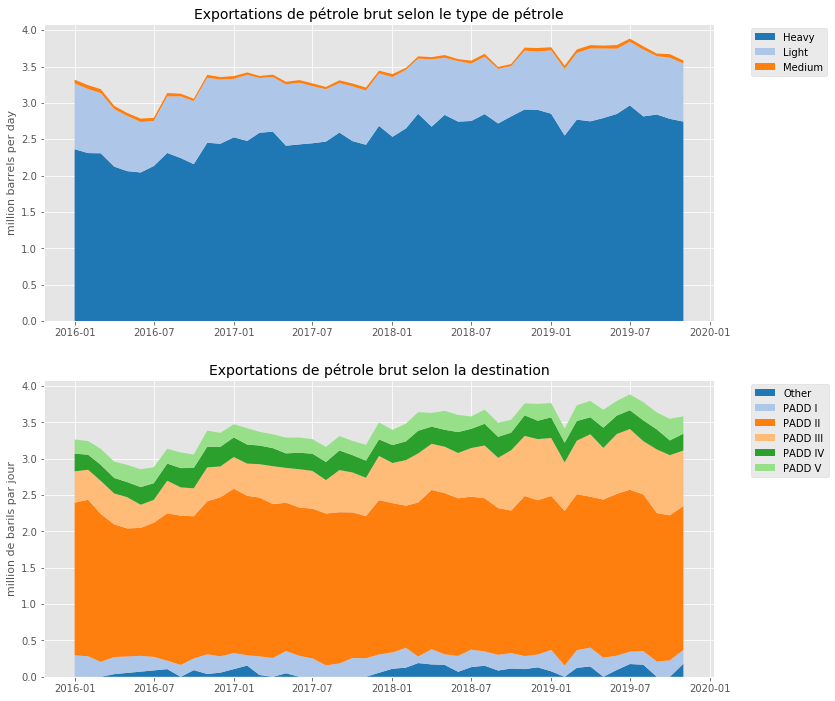

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(12,12))
ax1.stackplot(df_exports_type.index, df_exports_type.drop('Total', 1).T)
ax1.set_ylabel('million barrels per day', fontsize=11)
ax1.set_title('Exportations de pétrole brut selon le type de pétrole', fontsize=14)
ax1.legend(df_exports_type.drop('Total', 1).columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4);  

ax2.stackplot(df_exports_padd.index, df_exports_padd.drop('Total', 1).T)
ax2.set_ylabel('million de barils par jour', fontsize=11)
ax2.set_title('Exportations de pétrole brut selon la destination', fontsize=14)
ax2.legend(df_exports_padd.drop('Total', 1).columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4); 

#### 4) Autres ensembles de données liés aux exportations de pétrole brut
La base de données sur le commerce international canadien des marchandises renferme également des données sur le volume et la valeur des exportations de pétrole brut selon le partenaire commercial [(lien)](https://www5.statcan.gc.ca/cimt-cicm/home-accueil?lang=fra). Ce rapport repose sur des données commerciales sur base douanière provenant des dossiers administratifs de l’Agence des services frontaliers du Canada et de la Customs Border Protection des États-Unis. Le code du Système harmonisé pour le pétrole brut est 270900 (Huiles brutes, de pétrole ou de minéraux bitumineux).

Le rapport intitulé Approvisionnement et utilisation du pétrole brut et équivalent (tableau 25-10-0063-01) de Statistique Canada présente des données sur les exportations mensuelles de pétrole brut [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510006301&request_locale=fr). Les volumes d’exportation présentés dans le rapport Approvisionnement et utilisation du pétrole brut et équivalent ont été établis en fonction de données administratives et d’enquêtes.


Le bilan énergétique global intitulé Disponibilité et écoulement d'énergie primaire et secondaire en térajoules (tableau 25-10-0029-01) de Statistique Canada présente des données sur les exportations annuelles de pétrole brut [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/cv.action?pid=2510002901&request_locale=fr). Ce rapport renferme des données en unités d’énergie (térajoules) qui permettent de faire des comparaisons entre les combustibles et un cumul. Statistique Canada publie également le rapport Disponibilité et écoulement d'énergie primaire et secondaire en unités naturelles (tableau 25-10-0030-01) [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510003001&request_locale=fr). Ce rapport renferme les mêmes données, mais en unités naturelles, qui varient selon le type d’énergie (litres pour les combustibles liquides, GWh pour l’électricité, etc.), ce qui fait qu’elles ne peuvent pas toujours être cumulées ni comparées directement selon le type de combustible [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510003001&request_locale=fr).

La Régie tient à jour une visualisation interactive qui présente des données trimestrielles sur les échanges énergétiques entre le Canada et les États-Unis pour diverses sources d’énergie, notamment le pétrole brut [(lien)](https://apps2.cer-rec.gc.ca/importations-exportations/%C3%A9lectricit%C3%A9?config=eyJ2aXN1YWxpemF0aW9uU2V0dGluZ3MiOnsiZWxlY3RyaWNpdHnED2Ftb3VudCI6Ik1XLmgiLCJhcnJhbmdlQnkiOiJsb2PFP8QXY3RpdsUzImltcG9ydHNFeMUHIiwic3VidHlwZSI6IsQNxWDENTp7ImPEXHJ5IjpudWxsLCJvcmlnaW5zIjpbXSwiY29udGluZW50xxBkZXN0aW7FcOQAqH0sInByb3ZpbmNlxyHGbzpbXX0sInRpbWVsaW5lxGVzY2FsZUxpbmtlZCI6dHJ1ZSwiZ3JvdXBpbmciOiJ5ZWFyIiwi5QDVxS50YXJ0xAnFGToxOTkwLCJxdWFydGXED30sImVuZMogMjAxOMsgNH3EASznAQTmAQNW7AFqIjrtAWEsImxhbmd1YcR8ImbkAIlzaG93RXhwbGHpAOvmALNvcGVuzhhbzEpUaXRsZcsgIiwiY3J1ZGVPaWxJ5gGQ2yLnAavTIm5hdHVyYWxHYd4dTGlxdWlk1CRyZWZpbmVkUGV0cm9sZXVtUHJvZHVj02zmAfJmaWRlbnRpYWxpdHlNZW517AD%2BQ84f5QHq).


### Exportations de pétrole brut par chemin de fer
#### 1) Principal ensemble de données

La Régie publie chaque mois un rapport intitulé Exportations de pétrole brut canadien par chemin de fer – Données mensuelles. Les données se rapportent uniquement aux exportations. Aucune ventilation par province n’est disponible. Pour des raisons de confidentialité, aucune donnée antérieure à 2012 n’est disponible [(lien)](https://www.neb-one.gc.ca/nrg/sttstc/crdlndptrlmprdct/stt/cndncrdlxprtsrl-fra.html).

#### 2) Téléverser l’ensemble de données

In [19]:
# accéder au rapport « Exportations de pétrole brut canadien par chemin de fer – Données mensuelles » de la Régie 
url_rail = 'https://www.cer-rec.gc.ca/nrg/sttstc/crdlndptrlmprdct/stt/cndncrdlxprtsrl-eng.xlsx'
df_rail = pd.read_excel(url_rail, header=7, usecols='B:G', index_col=None)
df_rail.dropna(0, 'all', subset=df_rail.columns[2:], inplace=True)
df_rail['Year'] = df_rail['Year'].fillna(axis=0, method='ffill')
df_rail.columns = df_rail.columns.str.replace('\n', ' ')
df_rail['Date'] = pd.to_datetime(df_rail['Month'] + ' 1, ' + df_rail['Year'].astype(str), format='%B %d, %Y')
df_rail.set_index('Date', inplace=True)

#### 3) Faire un graphique pour l’ensemble de données

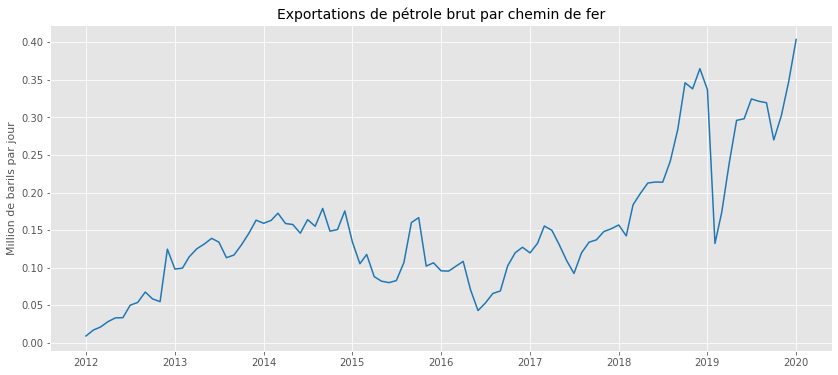

In [20]:
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(14,6))
ax1.plot(df_rail.index, df_rail['Volume (bbl per day)']/1000000)
ax1.set_ylabel('Million de barils par jour', fontsize=11)
ax1.set_title('Exportations de pétrole brut par chemin de fer', fontsize=14);

### Importations de pétrole brut
Le pétrole brut importé sert à approvisionner les raffineries régionales du Canada. La majeure partie est acheminée aux raffineries du Québec et du Nouveau-Brunswick. Le pétrole brut importé au Canada provient principalement des États-Unis. Contrairement aux exportations, la Régie ne réglemente pas les importations de pétrole brut.

#### 1) Principal ensemble de données
La base de données sur le commerce international canadien des marchandises renferme également des données sur le volume et la valeur des importations de pétrole brut selon le partenaire commercial [(lien)](https://www5.statcan.gc.ca/cimt-cicm/home-accueil?lang=fra). Ce rapport repose sur des données commerciales sur base douanière provenant des dossiers administratifs de l’Agence des services frontaliers du Canada et de la Customs Border Protection des États-Unis. Le code du Système harmonisé pour le pétrole brut est 270900 (Huiles brutes, de pétrole ou de minéraux bitumineux).

#### 2) Téléverser l’ensemble de données

In [21]:
# l’exécution de cette cellule prend environ 8 minutes
# « Huiles brutes, de pétrole ou de minéraux bitumineux » sous le code 270900 du Système harmonisé (commerce international canadien des marchandises)

# changer la date de fin dès que de nouvelles données sont disponibles
date_end = datetime.date.today()
date_start = datetime.date(2016, 1, 1)
dates = pd.date_range(date_start, date_end, freq='MS')

# URL pour obtenir les données de Statistique Canada sur les importations au moyen du code du Système harmonisé
url_imports = ('https://www5.statcan.gc.ca/cimt-cicm/topNCountries-pays?lang=eng&getSectionId()=0&'
       'dataTransformation=0&refYr=YYYY&refMonth=MM&freq=6&countryId=0&getUsaState()=0&'
       'provId=REGION&retrieve=Retrieve&country=null&tradeType=3&topNDefault=250&monthStr=null&'
       'chapterId=27&arrayId=0&sectionLabel=&scaleValue=0&scaleQuantity=0&commodityId=270900')

regions = {'Canada':'1', 'Newfoundland Labrador':'10', 'Prince Edward Is.':'11', 'Nova Scotia':'12', 
           'New Brunswick':'13', 'Quebec':'24', 'Ontario':'35', 'Manitoba':'46', 'Saskatchewan':'47', 
           'Alberta':'48', 'British Columbia':'59', 'Yukon':'60', 'Northwest Terr.':'61', 'Nunavut':'62'}

# télécharger les données une région et un mois à la fois
data = []
for r in regions:
    for d in dates:
        get_url = url_imports.replace('REGION',regions[r]).replace('YYYY',str(d.year)).replace('MM',str(d.month))
        try:
            df = pd.read_html(get_url, header=[0, 1, 2], index_col=None, encoding='utf-8')[0]
            df.columns.set_levels(df.columns.levels[0].str.replace(chr(160), ' '), level=0, inplace=True)
            # laisser seulement les colonnes commençant par « Pays » ou la date de téléchargement
            for col in df.columns:
                if not (col[0].replace(chr(160), ' ').startswith(d.strftime('%B %Y')) or col[0].startswith('Country')):
                    df.drop(col, 1, inplace=True)
            # s’il existe des données
            if len(df.columns) > 0:
                df.columns = df.columns.get_level_values(1)
                df['Region'] = r
                df['Date'] = d
                data.append(df)
        except:
            continue   

# enchaîner toutes les données sur les importations dans une fiche de données et nettoyer              
df_imports = pd.concat(data, axis=0, sort=False, ignore_index=True)
df_imports.rename(columns={'Country  (Select a country below to view top  250\xa0trade commodities)':'Country'}, inplace=True)
df_imports['Country'] = df_imports['Country'].str.replace(r'\(.*\)','').str.replace('\d+', '').str.strip()
df_imports['Quantity (million bbl/d)'] = df_imports['Quantity  (MTQ  )'].astype(float) * m3_to_bbl / df_imports['Date'].dt.daysinmonth / 1000000

# filtrer pour obtenir les importations au Canada et transposer selon le pays d’origine
df_imports_canada = df_imports[(df_imports['Region']=='Canada')].pivot_table(values='Quantity (million bbl/d)', index='Date', columns='Country')

# combiner les petits pays sous la catégorie « Autre »
big_countries = ['Algeria', 'Azerbaijan', 'Nigeria', 'Norway', 'Saudi Arabia', 'United States']
countries = [col for col in df_imports_canada if col in big_countries]
df_imports_canada['Other'] = df_imports_canada['World'] - df_imports_canada[countries].sum(axis=1)
countries.append('Other')

# filtrer pour obtenir les importations mondiales et transposer selon la destination (province importatrice)
df_imports_world = df_imports[(df_imports['Country']=='World')]
df_imports_world = df_imports[(df_imports['Country']=='World')].pivot_table(values='Quantity (million bbl/d)', index=['Date'], columns=['Region'])

#### 3) Faire un graphique pour l’ensemble de données

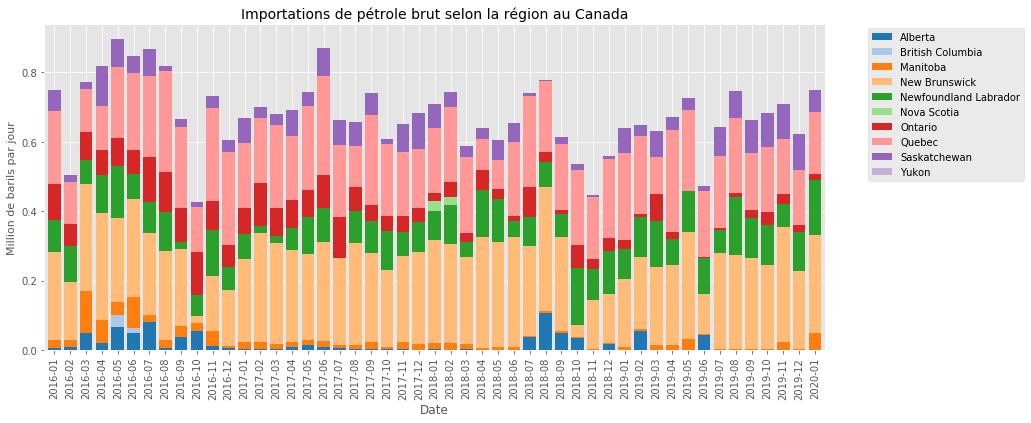

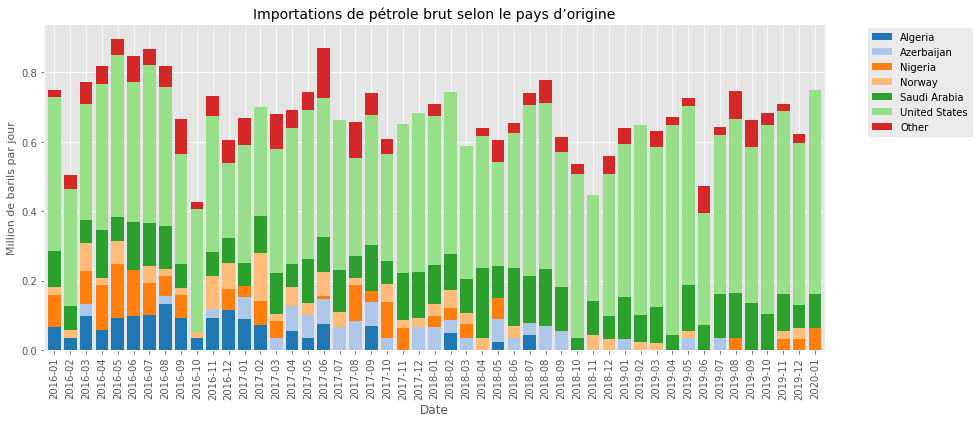

In [25]:
# créer des graphiques
ax1 = df_imports_world.drop(columns=['Canada']).plot(kind='bar', stacked=True, figsize=(14,6), width = 0.8)
ax1.set_ylabel('Million de barils par jour', fontsize=11)
ax1.set_title('Importations de pétrole brut selon la région au Canada', fontsize=14)
ax1.legend(df_imports_world.drop(columns=['Canada']).columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax1.set_xticklabels(df_imports_world.index.to_period('M'));

ax2 = df_imports_canada[countries].plot(kind='bar', stacked=True, figsize=(14,6), width = 0.8)
ax2.set_ylabel('Million de barils par jour', fontsize=11)
ax2.set_title('Importations de pétrole brut selon le pays d’origine', fontsize=14)
ax2.legend(df_imports_canada[countries].columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4) 
ax2.set_xticklabels(df_imports_canada.index.to_period('M'));

#### 4) Autres sources liées aux importations de pétrole brut
Le rapport intitulé Approvisionnement et utilisation du pétrole brut et équivalent (tableau 25-10-0063-01) de Statistique Canada présente des données sur les importations mensuelles de pétrole brut [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510006301&request_locale=fr). Les volumes d’importation présentés dans le rapport Approvisionnement et utilisation du pétrole brut et équivalent ont été établis en fonction de données administratives et d’enquêtes.

Le rapport intitulé Disponibilité et écoulement d'énergie primaire et secondaire en térajoules (tableau 25-10-0029-01) de Statistique Canada présente des données sur les importations annuelles de pétrole brut [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/cv.action?pid=2510002901&request_locale=fr). Ce rapport renferme des données en unités d’énergie (térajoules) qui permettent de faire des comparaisons entre les combustibles et un cumul. Statistique Canada publie également le rapport Disponibilité et écoulement d'énergie primaire et secondaire en unités naturelles (tableau 25-10-0030-01) [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510003001&request_locale=fr). Ce rapport renferme les mêmes données, mais en unités naturelles, qui varient selon le type d’énergie (litres pour les combustibles liquides, GWh pour l’électricité, etc.), ce qui fait qu’elles ne peuvent pas toujours être cumulées ni comparées directement selon le type de combustible [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510003001&request_locale=fr).

La Régie tient à jour une visualisation interactive qui présente des données trimestrielles sur les échanges énergétiques entre le Canada et les États-Unis pour diverses sources d’énergie, notamment le pétrole brut [(lien)](https://apps2.cer-rec.gc.ca/importations-exportations/%C3%A9lectricit%C3%A9?config=eyJ2aXN1YWxpemF0aW9uU2V0dGluZ3MiOnsiZWxlY3RyaWNpdHnED2Ftb3VudCI6Ik1XLmgiLCJhcnJhbmdlQnkiOiJsb2PFP8QXY3RpdsUzImltcG9ydHNFeMUHIiwic3VidHlwZSI6IsQNxWDENTp7ImPEXHJ5IjpudWxsLCJvcmlnaW5zIjpbXSwiY29udGluZW50xxBkZXN0aW7FcOQAqH0sInByb3ZpbmNlxyHGbzpbXX0sInRpbWVsaW5lxGVzY2FsZUxpbmtlZCI6dHJ1ZSwiZ3JvdXBpbmciOiJ5ZWFyIiwi5QDVxS50YXJ0xAnFGToxOTkwLCJxdWFydGXED30sImVuZMogMjAxOMsgNH3EASznAQTmAQNW7AFqIjrtAWEsImxhbmd1YcR8ImbkAIlzaG93RXhwbGHpAOvmALNvcGVuzhhbzEpUaXRsZcsgIiwiY3J1ZGVPaWxJ5gGQ2yLnAavTIm5hdHVyYWxHYd4dTGlxdWlk1CRyZWZpbmVkUGV0cm9sZXVtUHJvZHVj02zmAfJmaWRlbnRpYWxpdHlNZW517AD%2BQ84f5QHq).


### Charge d’alimentation des raffineries

#### 1) Principal ensemble de données

La Régie publie le rapport hebdomadaire intitulé Sommaires et données des charges hebdomadaires. La charge correspond au volume de pétrole brut traité par les raffineries canadiennes. Ce sont les raffineries du centre et de l’Est du Canada qui ont la plus grande capacité de raffinage au pays. L’ensemble de données englobe toutes les raffineries du Canada, sauf la raffinerie Sturgeon, en Alberta. Ces données remontent jusqu’à 2006 [(lien)](https://www.cer-rec.gc.ca/nrg/sttstc/crdlndptrlmprdct/stt/crdrn-fra.html).

#### 2) Téléverser l’ensemble de données

In [26]:
# télécharger la demande de brut selon la raffinerie
df_crude_run = pd.read_excel('https://www.cer-rec.gc.ca/nrg/sttstc/crdlndptrlmprdct/stt/crdrn-hstrcl.xlsx', header=7, parse_dates=['Week End / Semaine se terminant le']).dropna(1)
df_crude_run = df_crude_run.pivot_table(values='Runs for the week / Charges pour la semaine', index='Week End / Semaine se terminant le', 
                                        columns='Region (english) / Région (anglais)') * m3_to_bbl / 1000
df_crude_run.index.rename('Date', inplace=True)
df_crude_run['Canada'] = df_crude_run.sum(axis=1)
df_crude_run = df_crude_run[df_crude_run.index.year >= 2016]

#### 3) Faire un graphique pour l’ensemble de données

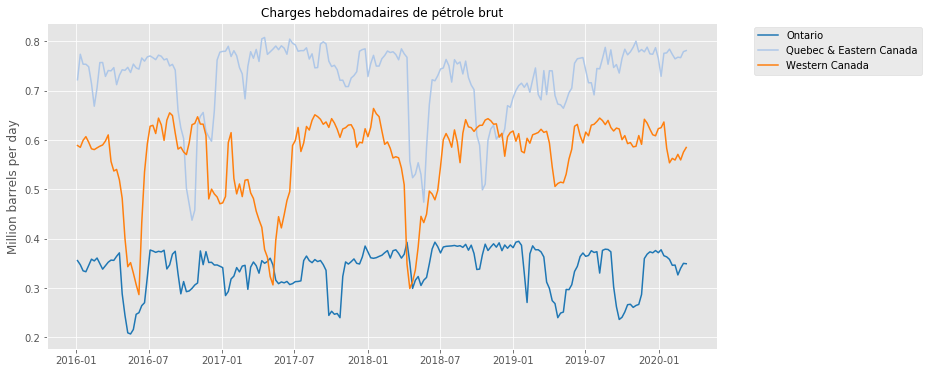

In [27]:
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax1.plot(df_crude_run.index, df_crude_run.drop('Canada', 1))
ax1.legend(df_crude_run.drop('Canada', 1).columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax1.set_title('Charges hebdomadaires de pétrole brut', fontsize =12)
ax1.set_ylabel('Million barrels per day');

#### 4) Autres ensembles de données contenant de l’information sur le raffinage au Canada
Le rapport intitulé Approvisionnement et utilisation du pétrole brut et équivalent (tableau 25-10-0063-01) de Statistique Canada présente des données sur l’alimentation mensuelle des raffineries canadiennes en pétrole brut [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510006301&request_locale=fr). Les données sur l’alimentation mensuelle des raffineries canadiennes présentées dans le rapport Approvisionnement et utilisation du pétrole brut et équivalent reposent sur des données administratives et d’enquêtes.

Le rapport Disponibilité et écoulement d'énergie primaire et secondaire en térajoules (tableau 25-10-0029-01) de Statistique Canada présente des données sur la demande annuelle de pétrole brut [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/cv.action?pid=2510002901&request_locale=fr). Ce rapport renferme des données en unités d’énergie (térajoules) qui permettent de faire des comparaisons entre les combustibles et un cumul. Statistique Canada publie également le rapport Disponibilité et écoulement d'énergie primaire et secondaire en unités naturelles (tableau 25-10-0030-01) [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510003001&request_locale=fr). Ce rapport renferme les mêmes données, mais en unités naturelles, qui varient selon le type d’énergie (litres pour les combustibles liquides, GWh pour l’électricité, etc.), ce qui fait qu’elles ne peuvent pas toujours être cumulées ni comparées directement selon le type de combustible [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510003001&request_locale=fr).

La Base de données complète sur la consommation d’énergie de Ressources naturelles Canada renferme des données détaillées sur la demande de pétrole brut et d’autres produits énergétiques. La base de données présente un aperçu de la consommation d’énergie au Canada selon le secteur (commercial, résidentiel, industriel, agricole et du transport) et dans chaque région du pays [(lien)](http://oee.nrcan.gc.ca/organisme/statistiques/bnce/apd/menus/evolution/tableaux_complets/liste.cfm).


### Projection de l’offre et de la demande de pétrole brut
#### 1) Principal ensemble de données
La Régie de l’énergie du Canada publie le rapport sur l’avenir énergétique [(lien)](https://www.cer-rec.gc.ca/nrg/ntgrtd/ftr/2019/index-fra.html), qui est une projection de l’offre et de la demande énergétiques au Canada jusqu’en 2040. Ce rapport comprend des projections de l’offre et de la demande de pétrole brut et de produits pétroliers raffinés. Les projections reposent sur des données historiques et comprennent une série d’hypothèses stratégiques, technologiques et commerciales décrites dans le rapport. Le rapport propose des annexes de données [(lien)](https://apps.neb-one.gc.ca/ftrppndc/dflt.aspx?GoCTemplateCulture=fr-CA) et des visualisations interactives [(lien)](https://apps2.cer-rec.gc.ca/dvs/?page=landingPage&) qui permettent d’explorer plus avant l’avenir énergétique du Canada. Le plus récent rapport sur l’avenir énergétique a été publié en décembre 2019.

#### 2) Téléverser l’ensemble de données

In [28]:
# accéder aux prévisions concernant la production pétrolière du rapport sur l’avenir énergétique 
url_ef = 'https://www.cer-rec.gc.ca/nrg/ntgrtd/ftr/2019/ccssndxplr/fgrs-eng.xlsx' # AE 2019
sheet_oil = '12'
df_forecast = pd.read_excel(url_ef, sheet_name=sheet_oil, header=4, index_col=0)

#### 3) Faire un graphique pour l’ensemble de données

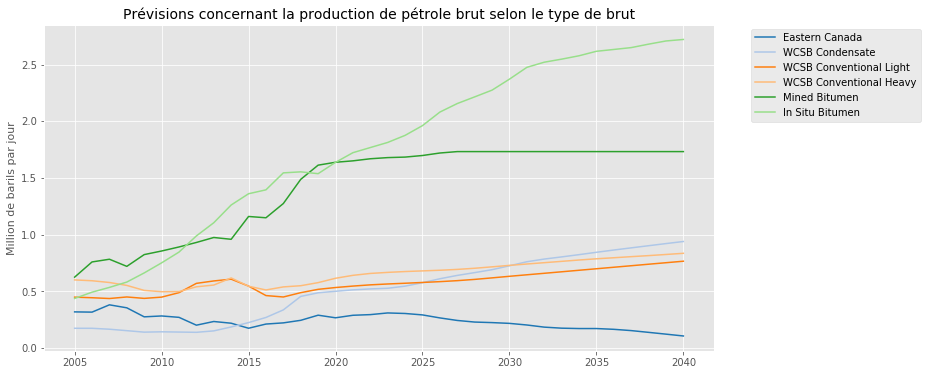

In [29]:
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax1.plot(df_forecast.index, df_forecast)
ax1.set_ylabel('Million de barils par jour', fontsize=11)
ax1.set_title('Prévisions concernant la production de pétrole brut selon le type de brut', fontsize=14)
ax1.legend(df_forecast.columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4);

En 2040, la production canadienne de pétrole brut atteint une moyenne de 7 millions de barils par jour dans le scénario de référence, soit une augmentation de 49 % par rapport à 2018. La production provient principalement de l’Alberta et le reste, de la Saskatchewan et du large de Terre-Neuve-et-Labrador.

#### 4) Autres sources liées aux prévisions concernant la production de pétrole brut au Canada
L’Alberta Energy Regulator publie le rapport ST98, qui fait une projection de la production de pétrole brut en Alberta [(lien)](https://www.aer.ca/providing-information/data-and-reports/statistical-reports/st98).

Sur la scène internationale, d’autres entités gouvernementales et non gouvernementales et sociétés publient des statistiques sur l’offre et la demande d’énergie à l’échelle mondiale, y compris au Canada, notamment les suivantes :
- Energy Information Administration des États-Unis – International Energy Outlook 2018 [(lien)](https://www.eia.gov/outlooks/ieo/);
- Agence internationale de l’énergie – World Energy Outlook [(lien)](https://www.iea.org/weo/);
- Centre de recherche sur l'énergie de l'Asie-Pacifique – Energy Demand and Supply Outlook [(lien)](https://aperc.ieej.or.jp/publications/reports/outlook.php);
- BP Energy Outlook [(lien)](https://www.bp.com/en/global/corporate/energy-economics/energy-outlook.html).

## Autres ressources
Veuillez vous reporter à l’inventaire canadien d’information sur l’énergie, une base de données interrogeable maintenue par le gouvernement qui renferme de l’information et des ensembles de données liés à l’énergie au Canada. Cet inventaire contient les adresses de plus de 200 ensembles de données concernant la consommation et la production d’énergie au Canada, et on peut y faire des recherches par auteur, produit et catégorie [(lien)](https://public.tableau.com/profile/energy.markets%23!/#!/vizhome/CanadianEnergyInformationInventoryCEII-V2_0/Datasets).

La liste de tous les ensembles de données utilisés dans le présent bloc-notes figure dans l’inventaire. Si vous souhaitez formuler des commentaires sur l’inventaire, veuillez écrire à CEII-ICIE@cer-rec.gc.ca.


In [30]:
authors = ['Margaret Skwara', 'Janna Rodioukova']